In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
car_img_path="car1.jpeg"

In [4]:
car.shape

(168, 300, 3)

In [7]:
def read_img(path, grayscale=True):
    car=cv2.imread(car_img_path)
    if grayscale:
        car_gray=cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
        plt.imshow(car_gray, cmap="gray")
        return car_gray
    color_img=cv2.cvtColor(car, cv2.COLOR_BGR2RGB)
    plt.imshow(color_img)
    return color_img
        

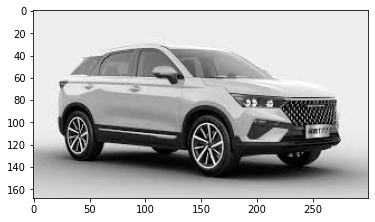

In [12]:
gray_car=read_img(car_img_path)

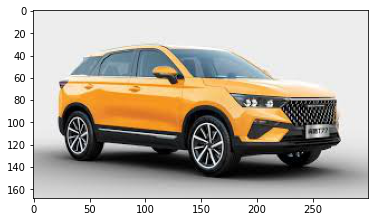

In [9]:
color_car=read_img(car_img_path, grayscale=False)

In [10]:
car.shape

(168, 300, 3)

In [13]:
gray_car.shape

(168, 300)

In [18]:
#1,r,c,1
row, col=gray_car.shape
gray_car1=gray_car.reshape(1, row,col,1)
gray_car1.shape


(1, 168, 300, 1)

In [14]:
color_car.shape

(168, 300, 3)

In [17]:
CONV_LAYER=tf.keras.layers.Conv2D(filters=1,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 input_shape=gray_car.shape)
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

ValueError: Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 168, 300)

In [20]:
CONV_LAYER=tf.keras.layers.Conv2D(filters=1,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 input_shape=gray_car1.shape[1:], padding="valid")
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [22]:
#trainable parameters
3*3+1

10

In [30]:
out=conv_model.predict(gray_car1)
row,col=out.shape[1:-1]
reshape_out=out.reshape(row,col)

In [31]:
reshape_out.shape

(166, 298)

In [26]:
(168-3+0)//1+1

166

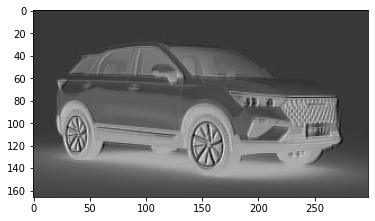

In [32]:
plt.imshow(reshape_out, cmap="gray")

# For Color Images

In [33]:
row, col,depth=color_car.shape

In [35]:
color_car1=color_car.reshape(1, row,col, depth)
color_car1.shape

(1, 168, 300, 3)

In [45]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=1,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car1.shape[1:])]
conv_model1=tf.keras.Sequential(CONV_LAYER)
conv_model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [47]:
color_out1=conv_model1.predict(color_car1)
color_out1.shape

(1, 166, 298, 1)

In [48]:
CONV_LAYER=[tf.keras.layers.Conv2D(filters=5,
                                  kernel_size=(3,3),
                                  strides=(1,1),
                                  input_shape=color_car1.shape[1:])]
conv_model=tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [49]:
color_out=conv_model.predict(color_car1)

In [50]:
color_out.shape

(1, 166, 298, 5)

# Try to Display outputs for 5 filters

In [71]:
def reshaping_in(img, grayscale=True):
    if grayscale:
        row,col=img.shape
        gray_car=img.reshape(1,row,col,1)
        return gray_car
    row,col,depth=img.shape
    color_car=img.reshape(1,row,col,depth)
    return color_car
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None):
    CONV_LAYER=[tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape)]
    conv_model=tf.keras.Sequential(CONV_LAYER)
    conv_model.summary()
    return conv_model
def apply_conv_model_and_visualize(img, conv_model):
    try:
        out=conv_model.predict(img)
        row,col,depth=out.shape[1:]
        
        reshape_out=out.reshape(row,col,depth)
        for d in range(depth):
            
            plt.imshow(reshape_out[:,:,d], cmap="gray")
            plt.show()
    except Exception as e:
        raise e
        

    
    
        

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


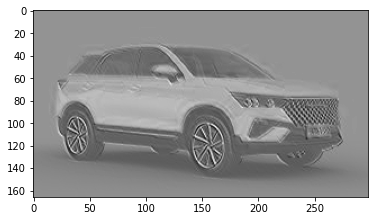

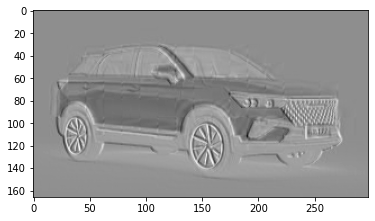

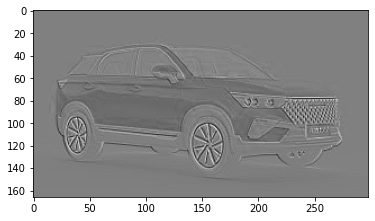

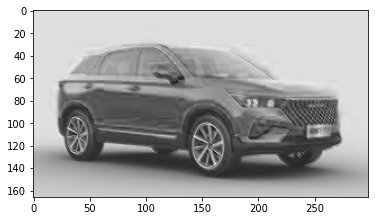

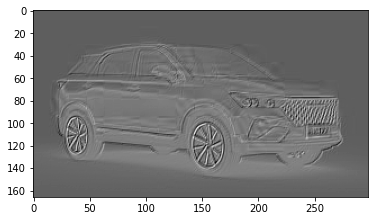

In [65]:
img=read_img(car_img_path, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=5, filter_size=(3,3),strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 166, 298, 10)      280       
                                                                 
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


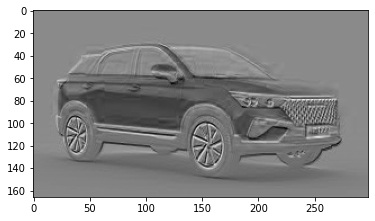

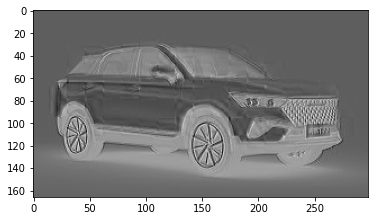

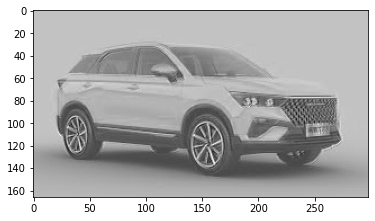

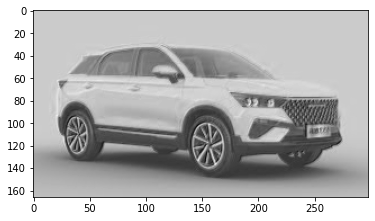

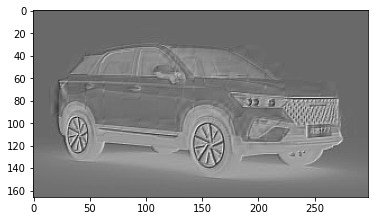

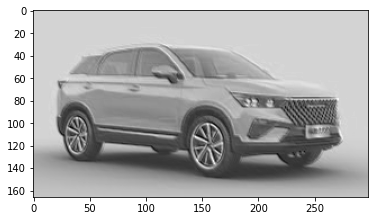

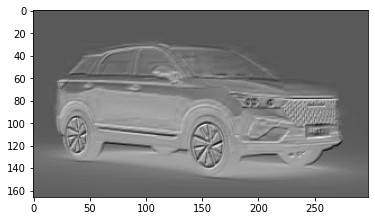

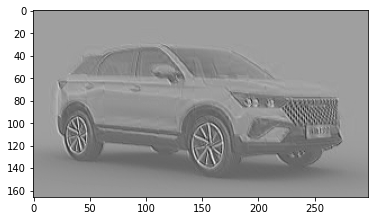

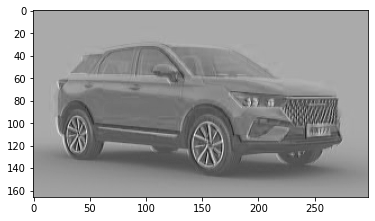

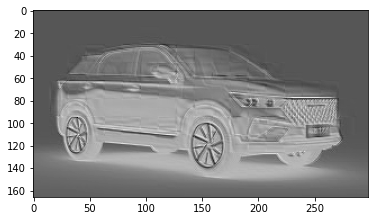

In [66]:
img=read_img(car_img_path, grayscale=False)
input_img=reshaping_in(img, grayscale=False)
model=get_conv_model(filters=10, filter_size=(3,3),strides=(1,1), input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img, model)

In [72]:

def max_pooling(img,pool_size=(2,2), strides=(2,2)):
    reshaped_img=reshaping_in(img)
    pooling_layer=tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
    result=pooling_layer(img)
    #print(result.shape)
    return result

ValueError: Input 0 of layer "max_pooling2d_1" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (168, 300)

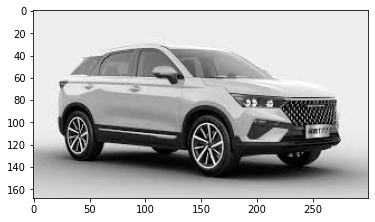

In [73]:
img=read_img(car_img_path)
result=max_pooling(img)